# Spaceship Titanic - kaggle competition

## In this notebook we are going to find the best ML model for predicting which passengers were transported to an alternate dimension and which didn't

### Data dictionary

    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    
    Destination - The planet the passenger will be debarking to.
    
    Age - The age of the passenger.
    
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    
    Name - The first and last names of the passenger.
    
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## General imports and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def load_data():
    return pd.read_csv("./data/train.csv"), pd.read_csv("./data/test.csv")

training_data, test_data = load_data()

In [3]:
training_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
training_data.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [5]:
print(training_data.dtypes, training_data.shape, "\n", training_data.describe())

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object (8693, 14) 
                Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.0

In [6]:
categorical_cols = training_data.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(training_data[col].value_counts())
    print("-----")

PassengerId
0001_01    1
0002_01    1
0003_01    1
0003_02    1
0004_01    1
          ..
9276_01    1
9278_01    1
9279_01    1
9280_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64
-----
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
-----
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
-----
Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64
-----
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64
-----
VIP
False    8291
True      199
Name: count, dtype: int64
-----
Name
Anton Woody          2
Apix Wala            2
Glenna Valezaley     2
Sharie Gallenry      2
Juane Popelazquez    2
                    ..
Kenny Mallerez       1
Darley Franton       1
Ties Apple           1
Annah Gilleyons      1
Solam Susent         1
Nam

<Axes: >

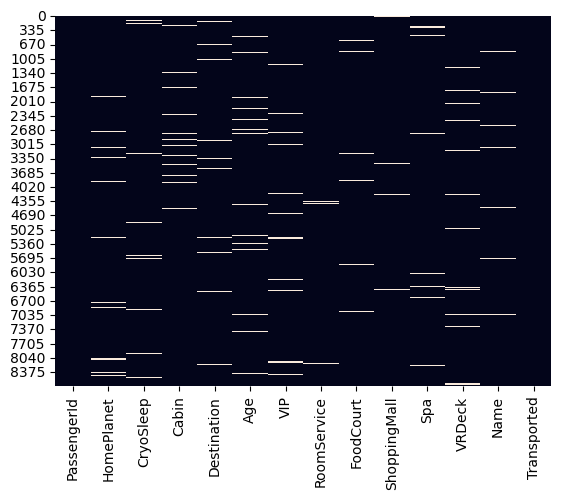

In [7]:
import seaborn as sns

sns.heatmap(training_data.isna(), cbar=False)

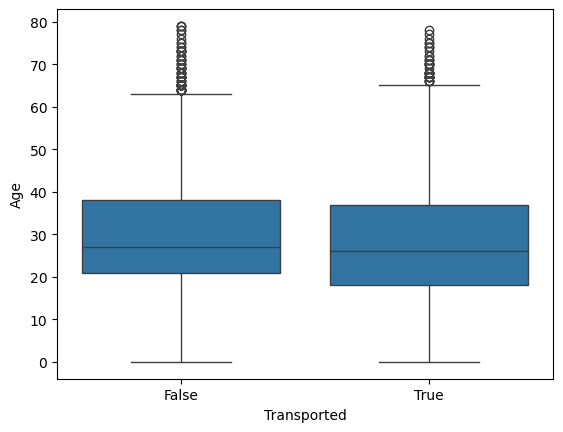

In [8]:
sns.boxplot(x="Transported", y="Age", data=training_data);

In [9]:
# sns.countplot(x="Deck", hue="Transported", data=training_data)
print(training_data["Cabin"].nunique())
print(training_data["Transported"].value_counts())

6560
Transported
True     4378
False    4315
Name: count, dtype: int64


C:\Users\szymo\AppData\Local\Temp\ipykernel_21348\1523010590.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = training_data.groupby(["AgeBin", "Transported"]).size().unstack(fill_value=0)
C:\Users\szymo\AppData\Local\Temp\ipykernel_21348\1523010590.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratios = training_data.groupby(["AgeBin"])["Transported"].mean()


Text(0.5, 0, 'Age')

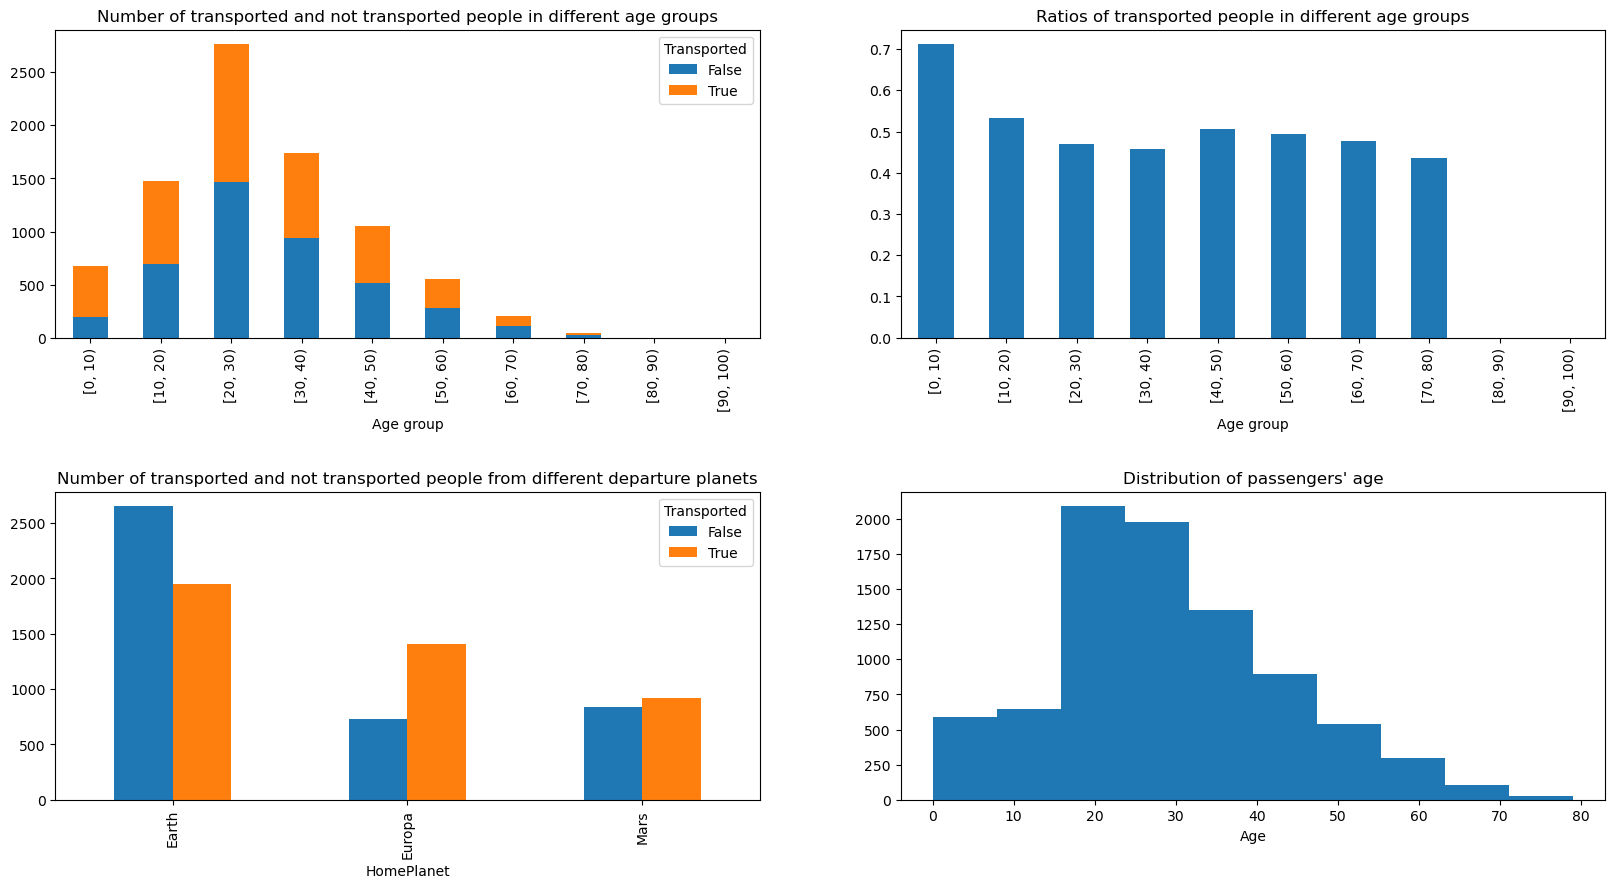

In [10]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

training_data["AgeBin"] = pd.cut(training_data["Age"], bins=range(0, 101, 10), right=False)

counts = training_data.groupby(["AgeBin", "Transported"]).size().unstack(fill_value=0)
counts.plot(kind="bar", ax=ax0, stacked=True)
ax0.set_title("Number of transported and not transported people in different age groups")
ax0.set_xlabel("Age group")

ratios = training_data.groupby(["AgeBin"])["Transported"].mean()
ratios.plot(kind="bar", ax=ax1)
ax1.set_title("Ratios of transported people in different age groups")
ax1.set_xlabel("Age group")

crosstab = pd.crosstab(training_data["HomePlanet"], training_data["Transported"])
crosstab.plot(kind="bar", ax=ax2)
ax2.set_title("Number of transported and not transported people from different departure planets")

ax3.hist(training_data["Age"])
ax3.set_title("Distribution of passengers' age")
ax3.set_xlabel("Age")

In [11]:
training_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"[30, 40)"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"[20, 30)"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"[50, 60)"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"[30, 40)"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"[10, 20)"


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype

In [45]:
def adjust_features(data):
    data[["GroupID", "PassengerGroupID"]] = data["PassengerId"].str.split("_", expand=True)
    data[["Deck", "Num", "Size"]] = data["Cabin"].str.split("/", expand=True)
    data[["FirstName", "SecondName"]]= data["Name"].str.split(" ", expand=True)

    data["GroupSize"] = data.groupby("GroupID")["PassengerGroupID"].transform("count")
    data["IsAlone"] = (data["GroupSize"] == 1).astype(int)

    data = data.drop(labels=["PassengerId", "Cabin", "Name", "GroupID", "PassengerGroupID"], axis=1)

    return data
    

In [46]:
training_data = load_data()[0]
training_data = adjust_features(training_data)
y_train = training_data["Transported"]
X_train = training_data.drop(labels=["Transported"], axis=1)
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Size,FirstName,SecondName,GroupSize,IsAlone
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,Maham,Ofracculy,1,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S,Juanna,Vines,1,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S,Altark,Susent,2,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S,Solam,Susent,2,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S,Willy,Santantines,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P,Gravior,Noxnuther,1,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S,Kurta,Mondalley,1,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S,Fayey,Connon,1,1
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S,Celeon,Hontichre,2,0


In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
num_features = [feature for feature in X_train.columns if is_numeric_dtype(X_train[feature])]
cat_features = [feature for feature in X_train.columns if not is_numeric_dtype(X_train[feature])]

preprocessor = Pipeline([
    ("num", SimpleImputer(strategy="median"), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", drop="if_binary"), cat_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])

In [ ]:
%%time

params = 0

# pipeline with GridSearch/RandomSearch
# .fit()